<a href="https://colab.research.google.com/github/SALMA55ASHRAF/AI_instant_tasks/blob/master/students_perfomance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df=pd.read_csv("/content/StudentsPerformance.csv")

In [111]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [112]:
df.shape

(1000, 8)

In [113]:
df=df[['gender'	,	'parental level of education',	'lunch',	'test preparation course',	'math score',	'reading score',	'writing score']]

In [114]:
df.shape

(1000, 7)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [116]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [117]:
# as our column test preparation course most of its values are none we will drop it
df.drop(columns=['test preparation course'],inplace=True)

In [118]:
df.head()

,gender,parental level of education,lunch,math score,reading score,writing score
0,female,bachelor's degree,standard,72,72,74
1,female,some college,standard,69,90,88
2,female,master's degree,standard,90,95,93
3,male,associate's degree,free/reduced,47,57,44
4,male,some college,standard,76,78,75


In [119]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [120]:
df.corr()

<ipython-input-120-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


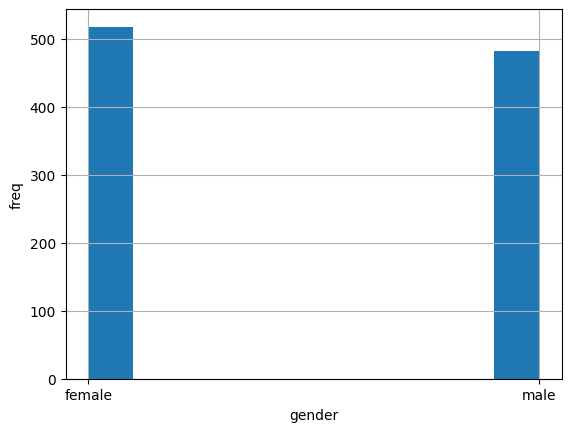

In [121]:
df['gender'].hist()
plt.xlabel("gender")
plt.ylabel("freq");

In [122]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
object_data=df.select_dtypes(object)
object_data

,gender,parental level of education,lunch
0,female,bachelor's degree,standard
1,female,some college,standard
2,female,master's degree,standard
3,male,associate's degree,free/reduced
4,male,some college,standard
...,...,...,...
995,female,master's degree,standard
996,male,high school,free/reduced
997,female,high school,free/reduced
998,female,some college,standard


In [123]:

#for col in object_data:
  #df[col]=le.fit_transform(df[col])

In [124]:
df.head()

,gender,parental level of education,lunch,math score,reading score,writing score
0,female,bachelor's degree,standard,72,72,74
1,female,some college,standard,69,90,88
2,female,master's degree,standard,90,95,93
3,male,associate's degree,free/reduced,47,57,44
4,male,some college,standard,76,78,75


In [125]:
df.corr()

<ipython-input-125-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [126]:
# see multicollinarty
#corr_df=df.drop(columns=['math score',	'reading score',	'writing score'])
#sns.heatmap(corr_df.corr(),annot=True)

In [127]:
#corr_df=df
#sns.heatmap(corr_df.corr(),annot=True)

In [128]:
X=df.drop(columns=['math score','reading score','writing score'])
y=df[['math score','reading score','writing score']]

In [129]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [130]:
x_train.columns

Index(['gender', 'parental level of education', 'lunch'], dtype='object')

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
model=make_pipeline(
    OneHotEncoder(),
    LinearRegression()

)
# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

In [132]:
from sklearn.metrics import mean_absolute_error
# Assuming y_true is the actual values and y_pred is the predicted values
mae = mean_absolute_error(y_test, model.predict(x_test))
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 11.075960855272372


In [133]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, model.predict(x_test))
print(f'mean_squared_error: {mse}')

mean_squared_error: 203.06700413774192


In [137]:
def function(gender,education,lunch):
  data={'gender':gender,
        'parental level of education':education,
        'lunch':lunch
        }
  df=pd.DataFrame(data,index=[0])
  l=model.predict(df)[0]
  print(f"math is {l[0]},reading is {l[1]}, wriritng is {l[2]}")
function(gender='female',education="bachelor's degree",lunch='standard')

math is 72.69206320846531,reading is 80.14168608678176, wriritng is 81.80514274875145
